**Importing the Libraries

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2


**Loding the Images

In [127]:
imgYes = cv2.imread("Brain_Tumor_Dataset/train/yes/y32.jpg")

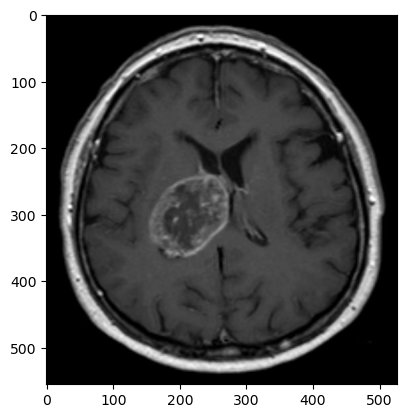

In [128]:
plt.imshow(imgYes)

In [129]:
imgYes.shape


(555, 526, 3)

In [130]:
imgNo = cv2.imread("Brain_Tumor_Dataset/train/no/No14.jpg")

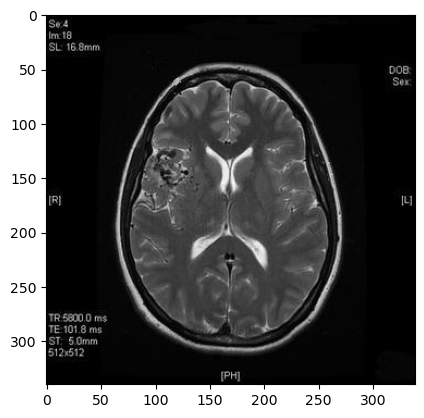

In [131]:
plt.imshow(imgNo)

In [132]:
imgNo.shape

(340, 339, 3)

**Train and Test Set

In [133]:
training_generator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)


In [134]:

train_dataset = training_generator.flow_from_directory('Brain_Tumor_Dataset/train',target_size=(128,128),batch_size=8,class_mode='categorical',shuffle=True)

Found 204 images belonging to 2 classes.


In [135]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [136]:
train_dataset.class_indices

{'no': 0, 'yes': 1}

In [137]:
test_generator = ImageDataGenerator(rescale=1./255,
                                   )
test_dataset = test_generator.flow_from_directory('Brain_Tumor_Dataset/test',target_size=(128,128),batch_size=1,class_mode='categorical',shuffle=False)

Found 49 images belonging to 2 classes.


In [138]:
(6272 +2 )/2

3137.0

**Building and Training the Neural Network

In [139]:
network = Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation ='relu' ))
network.add(Dropout(0.1))
network.add(Dense(units = 3137, activation ='relu' ))
network.add(Dropout(0.1))
network.add(Dense(units = 2, activation ='softmax' ))

network.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 32)       

In [140]:
network.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:

history = network.fit_generator(train_dataset,epochs=50 )

C:\Users\HP\AppData\Local\Temp\ipykernel_19992\684574936.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset,epochs=50 )


Epoch 1/50
26/26 [==============================] - 12s 397ms/step - loss: 1.0676 - accuracy: 0.6275
Epoch 2/50
26/26 [==============================] - 9s 360ms/step - loss: 0.6004 - accuracy: 0.6961
Epoch 3/50
26/26 [==============================] - 10s 384ms/step - loss: 0.5854 - accuracy: 0.6765
Epoch 4/50
26/26 [==============================] - 9s 356ms/step - loss: 0.5635 - accuracy: 0.7108
Epoch 5/50
26/26 [==============================] - 10s 382ms/step - loss: 0.5349 - accuracy: 0.7451
Epoch 6/50
26/26 [==============================] - 9s 349ms/step - loss: 0.5918 - accuracy: 0.6912
Epoch 7/50
26/26 [==============================] - 9s 356ms/step - loss: 0.5461 - accuracy: 0.7304
Epoch 8/50
26/26 [==============================] - 9s 361ms/step - loss: 0.5474 - accuracy: 0.7255
Epoch 9/50
26/26 [==============================] - 9s 338ms/step - loss: 0.5662 - accuracy: 0.7255
Epoch 10/50
26/26 [==============================] - 9s 351ms/step - loss: 0.5291 - accuracy: 0.7

**Evaluating the Neural Network

In [149]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

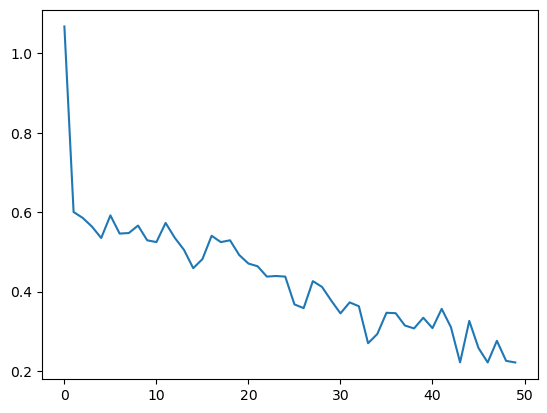

In [150]:
plt.plot(history.history['loss']);

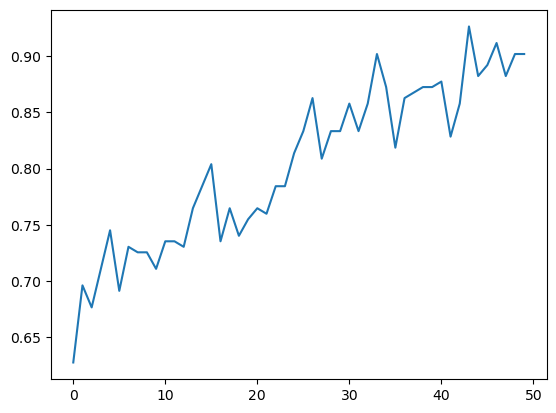

In [151]:
plt.plot(history.history['accuracy'])

In [142]:
test_dataset.class_indices

{'no': 0, 'yes': 1}

In [143]:
predictions = network.predict(test_dataset)
predictions

49/49 [==============================] - 1s 12ms/step


array([[9.9648404e-01, 3.5158941e-03],
       [9.9934310e-01, 6.5685308e-04],
       [8.2153791e-01, 1.7846207e-01],
       [6.3277352e-01, 3.6722645e-01],
       [9.9995363e-01, 4.6328460e-05],
       [1.0000000e+00, 2.8398362e-16],
       [9.8956108e-01, 1.0438907e-02],
       [1.0000000e+00, 2.5043691e-16],
       [9.9998164e-01, 1.8346393e-05],
       [9.8342472e-01, 1.6575221e-02],
       [3.3889007e-02, 9.6611094e-01],
       [8.1240022e-01, 1.8759978e-01],
       [9.9995375e-01, 4.6198533e-05],
       [9.8815548e-01, 1.1844461e-02],
       [5.7567501e-01, 4.2432499e-01],
       [8.4877038e-01, 1.5122968e-01],
       [8.8610744e-01, 1.1389255e-01],
       [2.8629245e-02, 9.7137070e-01],
       [7.8407949e-01, 2.1592049e-01],
       [5.2920848e-02, 9.4707918e-01],
       [4.1789415e-01, 5.8210582e-01],
       [9.9052464e-05, 9.9990094e-01],
       [7.1583599e-01, 2.8416395e-01],
       [2.3291355e-02, 9.7670865e-01],
       [6.2934056e-02, 9.3706596e-01],
       [1.9971531e-02, 9.

In [144]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [145]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.8979591836734694

<Axes: >

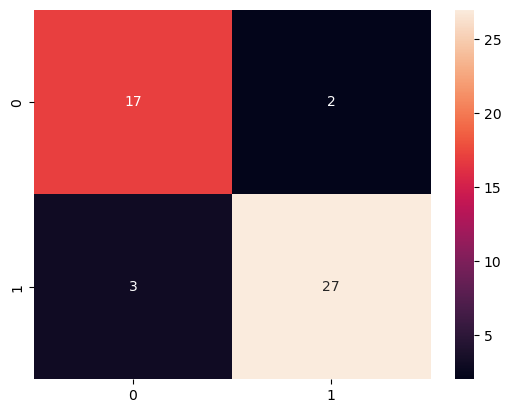

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm, annot=True)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.93      0.90      0.92        30

    accuracy                           0.90        49
   macro avg       0.89      0.90      0.89        49
weighted avg       0.90      0.90      0.90        49

